In [8]:
# import blind_test_data.csv and print the shape
import pandas as pd

test_data = pd.read_csv('test_data.csv')

print(test_data.shape)

(88283, 7)


In [9]:
from autogluon.tabular import TabularDataset, TabularPredictor

# load the training data
train_data = TabularDataset('test_data.csv')

train_data.head()

Loaded data from: test_data.csv | Columns = 7 / 7 | Rows = 88283 -> 88283


,SOC,V,I,P,V_avg_five,V_avg_one,I_avg
0,1.000000,4.159350,0.000000,0.000000,4.159350,4.159350,0.000000
1,0.999985,4.144870,-0.042657,-0.176808,4.152110,4.152110,-0.021328
2,0.999968,4.130847,-0.086232,-0.356210,4.145022,4.145022,-0.042963
3,0.999962,4.132999,-0.088823,-0.367105,4.142017,4.142017,-0.054428
4,0.999957,4.133799,-0.085364,-0.352877,4.140373,4.140373,-0.060615


In [10]:
time_limit = 60*5

# train the model
predictor = TabularPredictor(label='SOC').fit(
    train_data, 
    time_limit=time_limit,
    presets='best_quality'
)


No path specified. Models will be saved in: "AutogluonModels/ag-20230612_014032/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20230612_014032/"
AutoGluon Version:  0.7.0
Python Version:     3.10.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #148-Ubuntu SMP Mon Oct 17 16:02:06 UTC 2022
Train Data Rows:    88283
Train Data Columns: 6
Label Column: SOC
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.001855496372521, 0.1162339499769943, 0.54242, 0.32082)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'm

In [11]:
# test the model
y_pred = predictor.predict(test_data)

# print the predictions leader board
print(predictor.leaderboard(test_data, silent=True))

                   model    score_test  score_val  pred_time_test  \
0  KNeighborsDist_BAG_L1 -1.250492e-08  -0.012498        1.356409   
1    WeightedEnsemble_L2 -5.457388e-03  -0.009827        1.882942   
2      LightGBMXT_BAG_L1 -1.000521e-02  -0.011786        0.523937   
3  KNeighborsUnif_BAG_L1 -1.098546e-02  -0.013975        1.031687   
4      LightGBMXT_BAG_L2 -1.333371e-02  -0.016466        3.803345   
5    WeightedEnsemble_L3 -1.333371e-02  -0.016466        3.804964   
6        LightGBM_BAG_L1 -1.084484e-01  -0.109895        0.422678   
7        LightGBM_BAG_L2 -1.991361e-01  -0.200066        3.761743   

   pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       1.178864    0.144729                 1.356409                1.178864   
1       1.422873  158.851242                 0.002595                0.001170   
2       0.242839  158.106494                 0.523937                0.242839   
3       1.183366    0.227925                 1.031687 

In [12]:
predictor.evaluate(test_data, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -0.005457387828045046,
 'mean_squared_error': -2.978308190569422e-05,
 'mean_absolute_error': -0.0035549803876663228,
 'r2': 0.9997106294173049,
 'pearsonr': 0.9998565965997956,
 'median_absolute_error': -0.0021500626987304705}

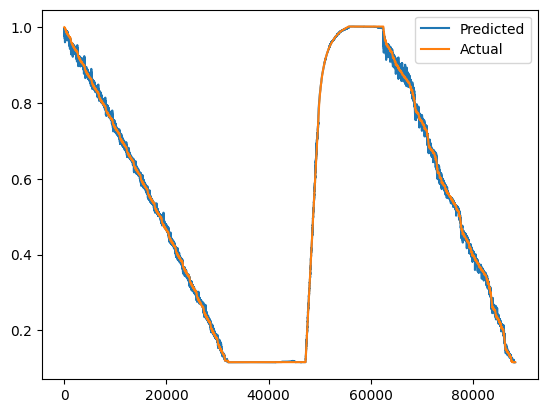

In [13]:
#plot the predictions vs the actual values in matplotlib
import matplotlib.pyplot as plt

plt.plot(y_pred, label='Predicted')
plt.plot(test_data['SOC'], label='Actual')
plt.legend()
plt.show()

In [14]:
#save the top performing model as a pickle file
import pickle

with open('test_model.pkl', 'wb') as f:
    pickle.dump(predictor, f)